<center><h1 class="list-group-item list-group-item-success">Image Segmentation</h1></center>

In [ ]:
# Importing Packages

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.io import imread,imshow
from skimage.filters import threshold_otsu
from skimage.feature import canny
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

In [ ]:
# Importing Data

image_non_tuberclosis = imread("https://res.cloudinary.com/qna/image/upload/v1637911593/a_edited_jqhlt5.jpg")
image_manual_microscope_with_bounding_box = imread("https://res.cloudinary.com/qna/image/upload/v1637911245/26_mmkk6t.jpg")
image_over_stained = imread("https://res.cloudinary.com/qna/image/upload/v1637911488/015_tphxq3.jpg")
image_autofocus_microscope = imread("https://res.cloudinary.com/qna/image/upload/v1637900441/01_ygbat3.jpg")

Threshold

In [ ]:
def threshold(image):
    # cv2.cvtColor is applied over the
    # image input with applied parameters
    # to convert the image in grayscale
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # applying different thresholding
    # techniques on the input image
    # all pixels value above 120 will
    # be set to 255
    ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
    ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
    ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
    ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

    # the window showing output images
    # with the corresponding thresholding
    # techniques applied to the input images
    plt.figure(figsize=(25,5))

    plt.subplot(161).imshow(thresh1,cmap="gray"),plt.title("BINARY THRESHOLD",fontsize = 12)
    plt.subplot(162).imshow(thresh2,cmap="gray"),plt.title("INVERSE BINARY THRESHOLD",fontsize = 12)
    plt.subplot(163).imshow(thresh3,cmap="gray"),plt.title("TRUNCATE THRESHOLD",fontsize = 12)
    plt.subplot(164).imshow(thresh4,cmap="gray"),plt.title("THRESHOLD TO ZERO",fontsize = 12)
    plt.subplot(165).imshow(thresh5,cmap="gray"),plt.title("INVERTED THRESHOLD TO ZERO",fontsize = 12)
    plt.subplot(166).imshow(image),plt.title("INVERSE BINARY THRESHOLD",fontsize = 12)

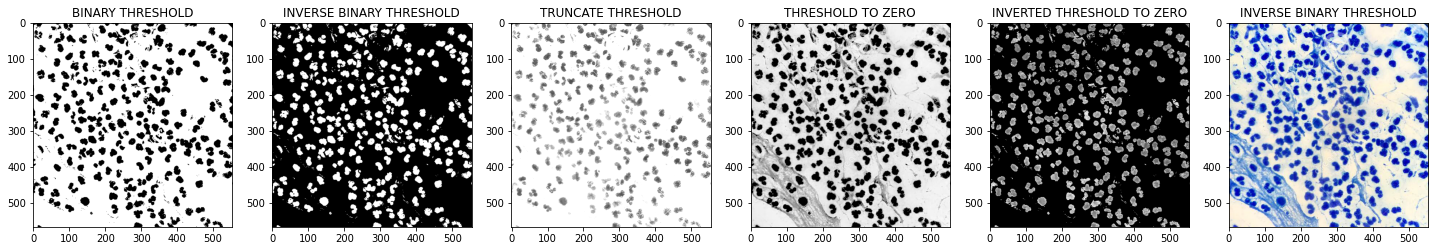

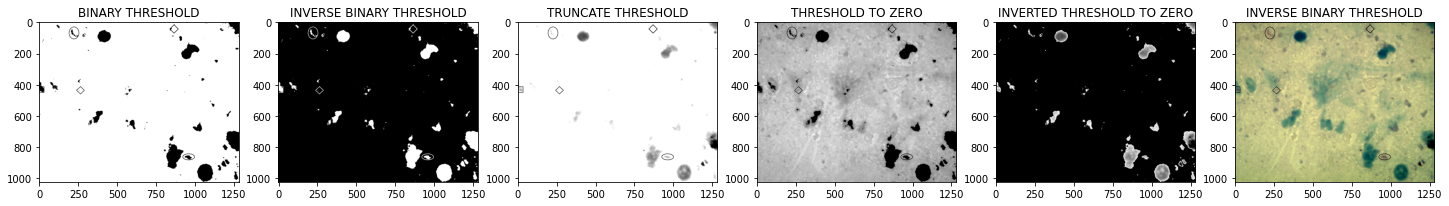

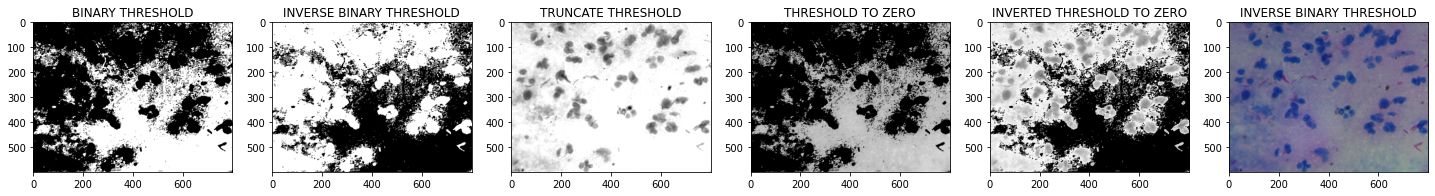

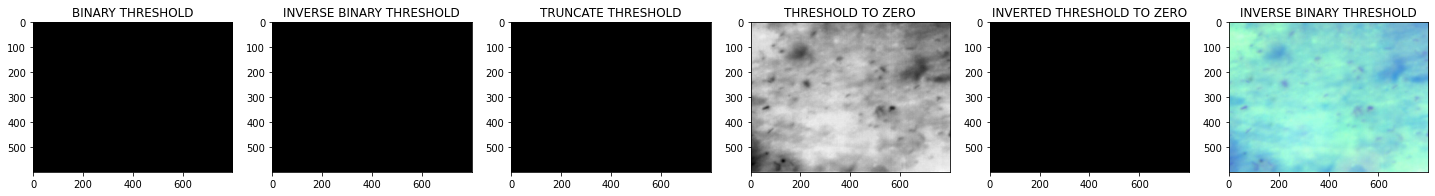

In [ ]:
threshold(image_non_tuberclosis)
threshold(image_manual_microscope_with_bounding_box)
threshold(image_over_stained)
threshold(image_autofocus_microscope)

OTSU

In [ ]:
def otsu(image):
    # cv2.cvtColor is applied over the
    # image input with applied parameters
    # to convert the image in grayscale
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # applying Otsu thresholding
    # as an extra flag in binary 
    # thresholding     
    ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                                cv2.THRESH_OTSU)     
    
    # the window showing output image         
    # with the corresponding thresholding         
    # techniques applied to the input image  
    plt.figure(figsize=(6,3))
    plt.subplot(121).imshow(image)
    plt.title("Orginal")
    plt.subplot(122).imshow(thresh1,cmap="gray")     
    plt.title("OTSU")

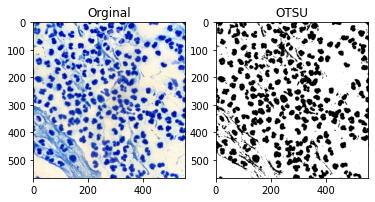

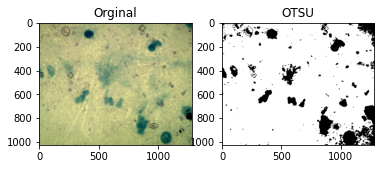

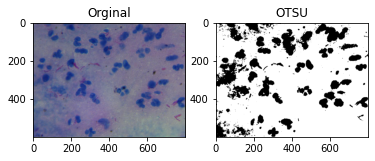

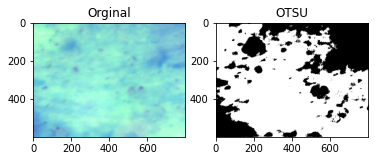

In [ ]:
otsu(image_non_tuberclosis)
otsu(image_manual_microscope_with_bounding_box)
otsu(image_over_stained)
otsu(image_autofocus_microscope)

Sobel

In [ ]:
def sobel(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
     
    # Calculation of Sobelx
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
     
    # Calculation of Sobely
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
     
    # Calculation of Laplacian
    laplacian = cv2.Laplacian(image,cv2.CV_64F)

    plt.figure(figsize=(20,4))

    plt.subplot(141).imshow(image),plt.title('original')
    plt.subplot(142).imshow(sobelx),plt.title('sobelx')
    plt.subplot(143).imshow(sobely),plt.title('sobely')
    plt.subplot(144).imshow(laplacian),plt.title('laplacian')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

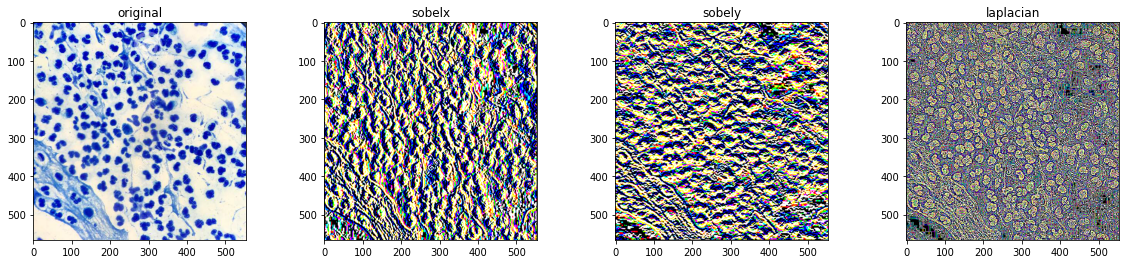

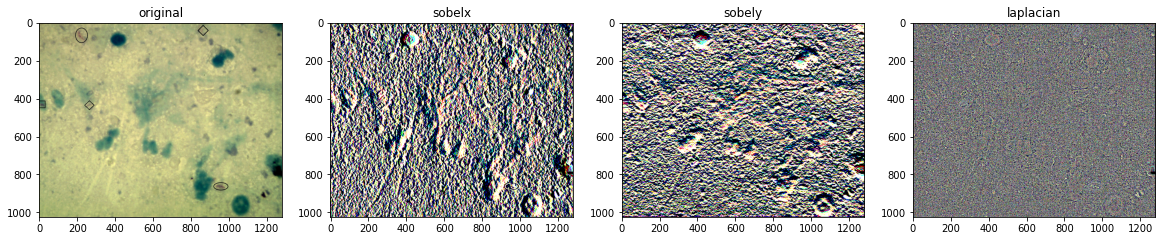

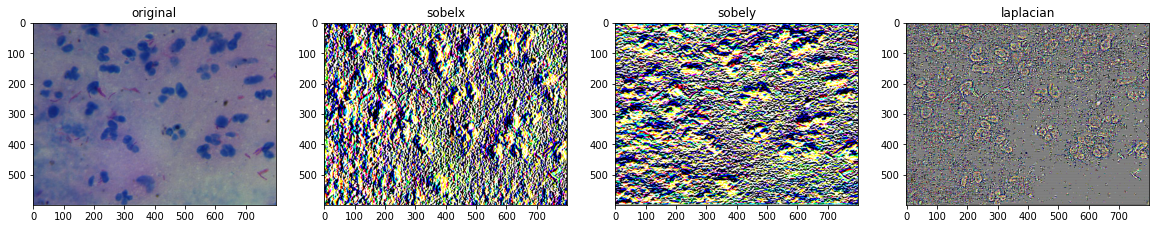

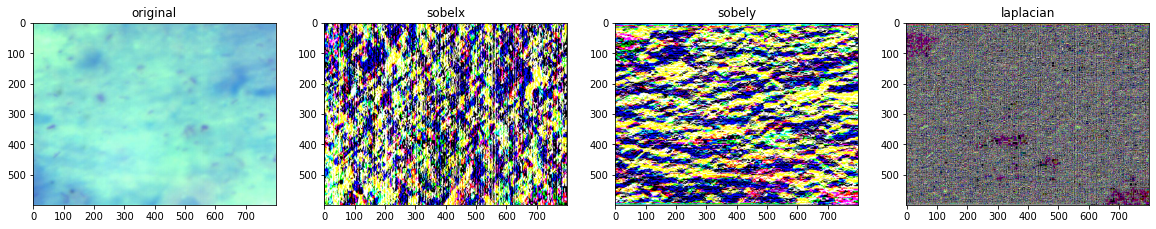

In [ ]:
sobel(image_non_tuberclosis)
sobel(image_manual_microscope_with_bounding_box)
sobel(image_over_stained)
sobel(image_autofocus_microscope)

K Means

In [ ]:
def KMeansSegmentation(image,k = 3):
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = image.reshape((-1,3))
    
    # Convert to float type
    pixel_vals = np.float32(pixel_vals)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    
    # then perform k-means clustering wit h number of clusters defined as 3
    #also random centres are initially choosed for k-means clustering
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    
    plt.figure(figsize=(8,4))
    plt.subplot(121).imshow(image),plt.title('Original')
    plt.subplot(122).imshow(segmented_image),plt.title('K Means')

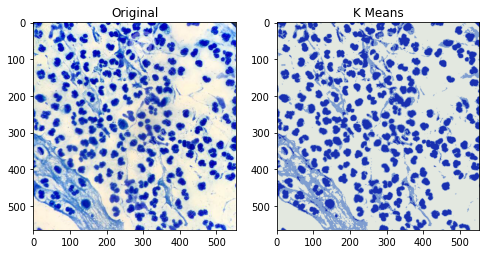

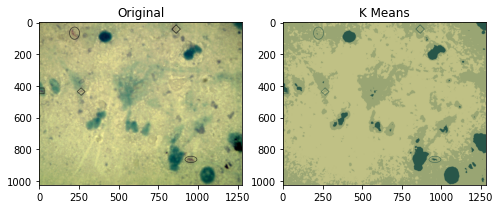

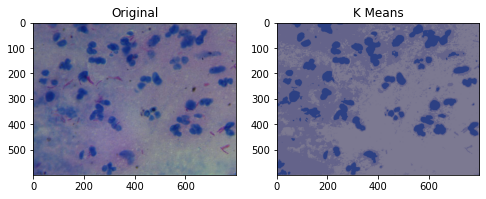

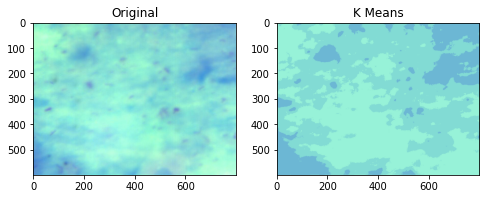

In [ ]:
KMeansSegmentation(image_non_tuberclosis)
KMeansSegmentation(image_manual_microscope_with_bounding_box)
KMeansSegmentation(image_over_stained)
KMeansSegmentation(image_autofocus_microscope)

Canny Edge Detection

In [ ]:
def canny_edge_detection(image):
    edges = canny(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255.)

    plt.figure(figsize=(8,4))
    plt.subplot(121).imshow(image),plt.title('Original')
    plt.subplot(122).imshow(edges,cmap="gray"),plt.title('Canny')

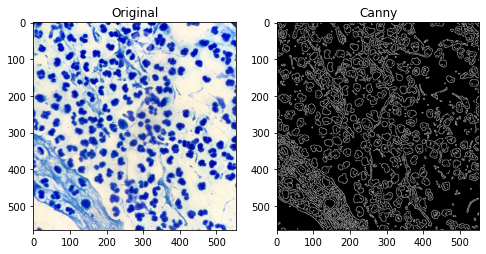

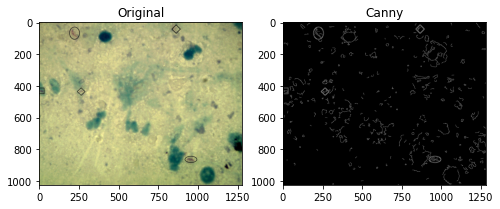

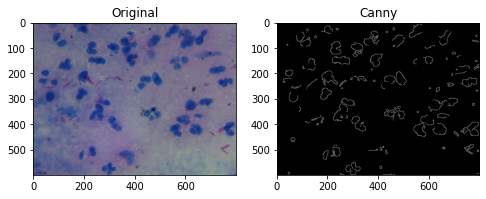

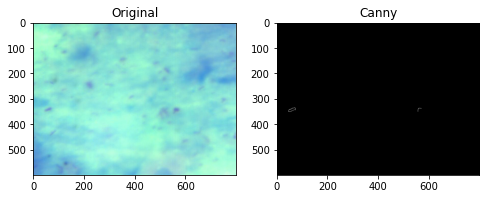

In [ ]:
canny_edge_detection(image_non_tuberclosis)
canny_edge_detection(image_manual_microscope_with_bounding_box)
canny_edge_detection(image_over_stained)
canny_edge_detection(image_autofocus_microscope)

Watershed segmentation

In [ ]:
def waterShed(image):

    # Load in image, convert to gray scale, and Otsu's threshold

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Compute Euclidean distance from every binary pixel
    # to the nearest zero pixel then find peaks
    distance_map = ndimage.distance_transform_edt(thresh)
    local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)

    # Perform connected component analysis then apply Watershed
    markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
    labels = watershed(-distance_map, markers, mask=thresh)

    # Iterate through unique labels
    total_area = 0
    for label in np.unique(labels):
        if label == 0:
            continue

        # Create a mask
        mask = np.zeros(gray.shape, dtype="uint8")
        mask[labels == label] = 255

        # Find contours and determine contour area
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        c = max(cnts, key=cv2.contourArea)
        area = cv2.contourArea(c)
        total_area += area
        cv2.drawContours(image, [c], -1, (36,255,12), 4)

    # print(total_area)
    
    plt.figure(figsize=(5,5))
    plt.subplot(111).imshow(image),plt.title('Water Shed')
    

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  # This is added back by InteractiveShellApp.init_path()
/root/venv/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  # This is added back by InteractiveShellApp.init_path()
/root/venv

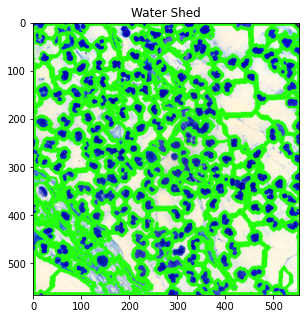

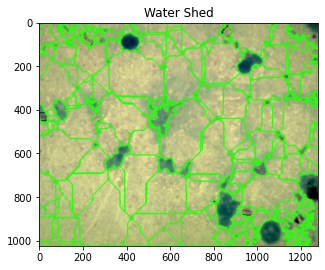

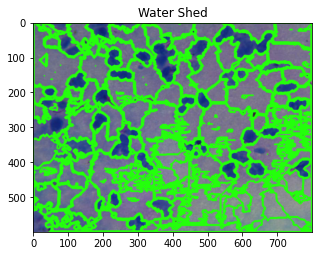

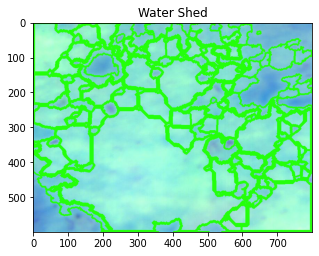

In [ ]:
waterShed(image_non_tuberclosis)
waterShed(image_manual_microscope_with_bounding_box)
waterShed(image_over_stained)
waterShed(image_autofocus_microscope)

Graphcut

UNet Segmentation

FCN

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41abca69-94a5-4d5a-a350-0ce8f4598ace' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>